In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import re

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

/Users/Timur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Timur/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Задание

С помощью генерации признаков получить rmse меньше 5000 на тестовой части выборки.

Постарайтесь получить такой результат сначала с помощью **RandomForestRegressor**, а затем и с помощью **Ridge**.

Если с помощью признаков меньше 5000 не получается, можно попробовать улучшить результат с помощью обучения других моделей, подбора параметров и усреднения предсказаний разных моделей.

Для генерации признаков вам сможет помочь код из последнего семинара.

# предобработаем данные

In [2]:
data = pd.read_csv('MotorcycleData.csv', encoding='cp1252', sep=',', )
data.drop('Unnamed: 0', axis=1, inplace=True)

# print(data.head(2))

f = lambda x: re.sub('[,$]', '', x)
data.Price = data.Price.map(f).astype(int)


data.head(5)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,Used,mint!!! very low miles,11412,"McHenry, Illinois, United States",2013.0,"16,000",Black,Harley-Davidson,Unspecified,Touring,...,NaN,False,8.1,NaN,2427,Private Seller,Clear,True,False,28.0
1,Used,Perfect condition,17200,"Fort Recovery, Ohio, United States",2016.0,60,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,False,100,17,657,Private Seller,Clear,True,True,0.0
2,Used,NaN,3872,"Chicago, Illinois, United States",1970.0,"25,763",Silver/Blue,BMW,Vehicle does NOT have an existing warranty,R-Series,...,NaN,False,100,NaN,136,NaN,Clear,True,False,26.0
3,Used,CLEAN TITLE READY TO RIDE HOME,6575,"Green Bay, Wisconsin, United States",2009.0,"33,142",Red,Harley-Davidson,NaN,Touring,...,NaN,False,100,NaN,2920,Dealer,Clear,True,False,11.0
4,Used,NaN,10000,"West Bend, Wisconsin, United States",2012.0,"17,800",Blue,Harley-Davidson,NO WARRANTY,Touring,...,NaN,False,100,13,271,OWNER,Clear,True,True,0.0


# разобьем их на трейн и тест

часть выборки мы сохраним и будем использовать как тестовую выборку

In [3]:
target = 'Price'

skf = KFold(shuffle=True, random_state=0)
for itr, ite in skf.split(data):
    break

y_train = data.loc[itr, target].values
y_test = data.loc[ite, target].values
data.loc[ite, target] = np.nan
data.drop(['Price'], axis=1, inplace=True)



print(len(itr), len(ite))
# data.describe()
data.describe(include=['O'])

4995 2498


,Condition,Condition_Desc,Location,Mileage,Exterior_Color,Make,Warranty,Model,Sub_Model,Type,Feedback_Perc,Watch_Count,Seller_Status,Vehicle_Tile
count,7493,1656,7491,7471,6778,7489,5107,7434,2179,6257,6785,3278,6861,7439
unique,2,1184,2026,3985,869,59,70,1750,1207,230,63,76,29,4
top,Used,Excellent condition,"Suncook, New Hampshire, United States",0,Black,Harley-Davidson,Vehicle does NOT have an existing warranty,Touring,FINANCING AVAILABLE - 704-824-8533,Gasoline,100,1<,Dealer,Clear
freq,6564,20,392,547,1833,2955,2624,805,20,1619,5723,520,3753,7159


In [ ]:
#Алгоритм
# 1. Посмотреть на корреляцию признаков
#    1.1 Возможно удалить некоторые столбцы
#    1.2 Определить и натренировать отдельно некоторые столбцы
#    1.3 Заменить текстовые на числовые (столбцы: Condition, Condition_desc, Feedback, Extrior_Color, Make, Warranty, Type)
# 2. Посчитать на среднее, матожидание по столбцам
# 3. Все пропущенные значения признаков заполнить нулями или средними значениями
# 4. Протестировать на разных алгоритмах

In [4]:
# Deleted 
# Аукцион отрицательно влияет практически на все признаки - можно и удалить


data.drop(['Feedback_Perc'], axis=1, inplace=True)
data.head(10)

,Condition,Condition_Desc,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,Sub_Model,Type,Vehicle_Title,OBO,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,Used,mint!!! very low miles,"McHenry, Illinois, United States",2013.0,"16,000",Black,Harley-Davidson,Unspecified,Touring,street glide custom,Cruiser,NaN,False,NaN,2427,Private Seller,Clear,True,False,28.0
1,Used,Perfect condition,"Fort Recovery, Ohio, United States",2016.0,60,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,Street Glide,Sport Touring,NaN,False,17,657,Private Seller,Clear,True,True,0.0
2,Used,NaN,"Chicago, Illinois, United States",1970.0,"25,763",Silver/Blue,BMW,Vehicle does NOT have an existing warranty,R-Series,R75/5 SWB,Standard,NaN,False,NaN,136,NaN,Clear,True,False,26.0
3,Used,CLEAN TITLE READY TO RIDE HOME,"Green Bay, Wisconsin, United States",2009.0,"33,142",Red,Harley-Davidson,NaN,Touring,ultra classic,Touring,NaN,False,NaN,2920,Dealer,Clear,True,False,11.0
4,Used,NaN,"West Bend, Wisconsin, United States",2012.0,"17,800",Blue,Harley-Davidson,NO WARRANTY,Touring,STREET GLIDE,Touring,NaN,False,13,271,OWNER,Clear,True,True,0.0
5,Used,It&#039;s a &#039;72 in good shape,"Watervliet, Michigan, United States",1972.0,0,Red,Harley-Davidson,Vehicle does NOT have an existing warranty,Sportster,NaN,NaN,NaN,False,NaN,412,Private Seller,Clear,True,False,1.0
6,Used,NaN,"Sterling, Illinois, United States",2010.0,"5,548",Grey / Red / Silver Metallic,Harley-Davidson,NaN,Touring,GATOR GLASS PAINT,Touring,NaN,False,NaN,6229,Dealer,Clear,True,False,1.0
7,Used,NaN,"Williamston, Michigan, United States",1975.0,"17,868",Black,Harley-Davidson,Vehicle does NOT have an existing warranty,Sportster,XLH,Sportster,NaN,False,NaN,1159,Private Seller,Clear,True,False,6.0
8,Used,NaN,"Palatine, Illinois, United States",2014.0,"2,800",Cherry Red,Harley-Davidson,Vehicle does NOT have an existing warranty,Touring,NaN,Touring,NaN,False,16,3,Private Seller,Clear,True,True,6.0
9,Used,NaN,"Chicago, Illinois, United States",2015.0,"3,000",Black,Harley-Davidson,Vehicle has an existing warranty,Sportster,Forty Eight,Cruiser,NaN,False,NaN,1,Private Seller,Clear,True,False,0.0


In [5]:

def searchfunction(pattern, series, colname):
    
    print(series.shape)
    for i, v in series.iteritems():
#         print(i, v)
        if (re.search(pattern, str(v))):
            v = pattern
            data.at[i, colname] = str(pattern)
        
    

## Seller_Status

In [6]:
#===Seller

#Надо one-hot encoding
data['Seller_Status'] = data['Seller_Status'].str.lower()
data['Seller_Status']  = data['Seller_Status'].fillna("none") #Потом исправить
data.groupby(['Seller_Status'])['Seller_Status'].count()

Seller_Status
220000                                                1
belvidere police department                           1
bikesfordutch                                         1
by owner                                              2
carrigan motor group                                  5
customs by barry, 40+ years successful building       1
dealer                                             3753
factory                                               1
first owner                                           2
johnny ray richland    trike on america               5
manufacturer                                          1
none                                                632
onwer                                                 1
original owner                                        4
original owners son                                   1
owner                                               184
pawnbroker                                            1
peter root                        

In [7]:
# parsedData = data.groupby(['Seller_Status'])['Seller_Status'].count()
# print(parsedData.index)
# parsedData = pd.DataFrame({'Seller_Status': parsedData.index, 'Count':parsedData.values})
searchfunction(r'owner', data['Seller_Status'], 'Seller_Status')
searchfunction(r'private', data['Seller_Status'], 'Seller_Status')


data['Seller_Status'] = data['Seller_Status'].replace(['220000', 'bikesfordutch', 'belvidere police department', 'factory', 'manufacturer', 'pawnbroker', 'peter root', 'ricky'], 'private')
data['Seller_Status'] = data['Seller_Status'].replace(['carrigan motor group', 'customs by barry, 40+ years successful building', 'johnny ray richland    trike on america', 'shoreline harley -  davidson', 'wholesale'], 'dealer')
data['Seller_Status'] = data['Seller_Status'].replace(['onwer'], 'owner')



print(data.groupby(['Seller_Status'])['Seller_Status'].count())
print(data.Seller_Status.value_counts())
#Заполнить нули none чем-то
data['Seller_Status'] = data['Seller_Status'].map({'dealer': 1, 'owner': 2, 'private':3, 'none':0})

(7493,)
(7493,)
Seller_Status
dealer     3766
none        632
owner       196
private    2899
Name: Seller_Status, dtype: int64
dealer     3766
private    2899
none        632
owner       196
Name: Seller_Status, dtype: int64


## Model_Year

In [8]:
#удаляем nan Значения

print(data[data['Model_Year'].isnull()].any(axis=1))
# print("1=", data.ix[5268])
# data = data[np.notnull(data['Model_Year'])]
data = data.dropna(subset=['Model_Year'])
# print("2=", data.ix[5268])

data['Model_Year'] = data['Model_Year']*1.0

5268    True
6144    True
6164    True
6184    True
dtype: bool


2018.0


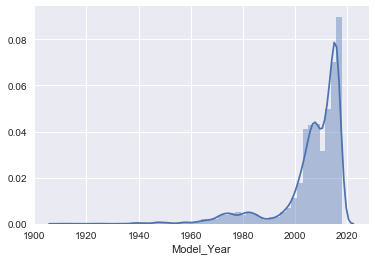

In [11]:
# Take a further look at Age
print(data['Model_Year'].max())
sns.distplot(data['Model_Year'])

## MileAge

In [9]:
def ddd(x):
    print(x)
    return re.sub(',', '', x)

In [10]:
# data['Mileage'] = data['Mileage'].fillna(-1)


print(data[data['Mileage'].isnull()].any(axis=1))

# print(data['Mileage'][1602])
# print(data['Mileage'])

data['Mileage'] = data['Mileage'].replace('N/A',np.NaN)
data['Mileage'] = data['Mileage'].replace('n/a',np.NaN)
data['Mileage'] = data['Mileage'].replace('Na',np.NaN)

data['Mileage'] = data['Mileage'].fillna("-1")

# print(data['Mileage'][1602])


data['Mileage'] = data['Mileage'].map(ddd).astype(int)


#Осталось заменить значения меньше на значения медиан (медианы уже есть) 



1602    True
1691    True
1711    True
2347    True
2530    True
2851    True
3151    True
3181    True
3761    True
3766    True
4015    True
4397    True
4491    True
5245    True
5285    True
5800    True
6022    True
6051    True
dtype: bool
16,000
60
25,763
33,142
17,800
0
5,548
17,868
2,800
3,000
30
5,800
55,000
57,898
22,102
7,792
9,305
1,125
5,500
250
140
25,405
28,888
23,658
13,089
23,546
40,000
3,769
8,700
16,827
15,000
2,900
15,200
10,319
29,544
10,893
35,735
9,908
8,950
5,600
20,000
55,782
1,350
15,400
1,533
22,896
24,742
1,500
51,000
6,650
5,184
3,699
37,500
6,599
999,999
8,471
39,242
6,650
10,000
8,000
37,600
9,622
12,649
20,000
1,350
13,000
3,644
22,896
16,500
14,950
48,505
43,971
55,300
21,451
34,696
1,530
23,000
39,242
4,065
3,400
2,120
21,300
13,000
21,760
34,530
10,700
22,000
4,185
13,500
41,500
48,985
20,000
2,571
2,600
949
955
26,000
30,000
30,200
1,067
2,600
11,200
43,312
4,185
1,700
999,999
46,000
19,010
28,000
0
9,490
3,964
12,500
20,000
17,936
1,500
216
70,000


2,382
1,167
19,008
4,515
4,515
10,977
13,811
13,500
6
2,175
2,000
23,292
623
25
43,000
28,000
5,900
1,275
35
500
11,357
1,200
16,896
8,757
999,999
5,026
15,508
31,000
33,500
935
30
0
15,878
5,795
600
8
0
3,822
5,500
3,500
3,880
19,000
0
18,000
0
27,360
34,000
49,695
20,977
9,233
0
263
800
2,098
7,900
4,800
42,875
13,000
21,266
3,900
15,156
4,788
8,420
22,000
6,500
16,662
19,909
950
3,959
28,634
879
8,114
4,200
4,496
19,008
30
1,500
13,811
2
17,566
19,200
623
10,131
3,491
43,000
15,900
1,200
123
5,000
999,999
28,400
16,252
3,333
0
16,000
8,560
17
3,500
19,000
23,865
42,249
38,361
49,695
46,308
16,252
21,973
19,500
0
16,000
11,111
17
3,500
4
300
27,724
750
100
19,000
18,000
42,249
7,608
49,695
4,300
46,308
0
800
7,612
81
7,450
792
7,732
5
2,650
29,000
9
920
0
10,600
10,857
5,058
10,628
5,300
5,733
49,734
715
99,999
1,085
3,150
34,386
4,800
17,245
6,000
10,320
3,900
33,811
802
6,500
27,655
19,733
457
20,000
23,352
950
22,921
29,175
0
68,319
0
12,402
4,496
47,591
2,519
7,186
848
10,573
6,3

86
14,985
26,000
4,330
8,800
5,000
17,500
2,301
1,636
4,604
1,111
3,686
6,800
3,353
5,439
100
25,458
59,674
46,187
19,449
14,052
8,000
0
11,210
19,449
20,997
11,300
1
15,644
6
7,769
6,266
24,236
6,250
2,411
10,765
9,123
70,950
4,123
3,500
5,400
15,000
9,938
7,507
25,755
81,566
33,102
100
0
22,119
6,000
32,165
2,215
26,000
36,519
4,330
0
500
9,732
80,556
0
1,618
2,012
-1
4,548
7
15,644
1
8,000
14,710
320
5,400
44,025
30,000
1
3,500
632
6,328
275
100
22,119
6,000
10,929
48,000
602
5,800
3,778
16,500
16,100
11,700
3,373
200
0
10,436
27,482
908
1,717
1,246
24,000
50,000
550
10,000
0
4,920
16,357
100
1
6,952
4,376
12,900
600
4,548
7
15,644
769
10,780
0
12,155
219
14,710
3,081
5,995
9,223
12,307
12,698
13,500
1,625
23,757
9,045
1,500
27,219
30,000
18,681
1,087
16,500
16,100
11,700
18,283
0
15,392
15,789
248
613
149
50,000
123,456,789
900
15,000
10,000
5,830
2,908
1,101
14,417
19,219
3,185
21,669
10,780
2,089
36
8,750
4,163
25,450
2,266
791
21,213
723
16,000
14,718
0
8,500
18,643
4,064
19,692

36,157
12,484
1
9,600
3,400
5,184
1
0
398
140
19,411
0
2,673
536
1
10,000
17,742
200
4,362
2,319
2,451
4,926
4,926
2,500
7,801
76,164
2,319
19,000
1,193
10,249
21,170
2,000
0
3,419
37,819
19,964
2
7,964
24,167
2
2,123
1,643
10,808
50
15,500
0
0
35,500
6,000
10,642
0
9,675
8,732
14,950
364
10,810
19,733
22,000
43,702
30,000
0
16,825
150
2,038
14,629
7,914
4,861
30,400
0
1,000
65
0
13,355
45,000
2,500
8,419
3,924
359
3,245
1
4,994
9,690
1
1,592
14,999
5,811
0
0
21,900
12,345
9,842
8,300
7,036
1
15,100
7,000
1
7,380
16,000
4,412
1
2,945
1
28,314
941
21,244
7,633
8,300
3,500
1
577
12,480
18,517
1
2,030
13,433
140
18,156
0
9,014
7
10
29,502
7
0
6,505
2,680
0
7,364
3,776
908
500
1,772
2,448
0
3,500
20,592
16,357
660
20,374
2,990
14,718
-1
9,486
1,611
15,251
7,364
0
4,545
6,773
37,366
6,685
2,829
18,612
20,605
9,381
112
38,442
10,500
999,999
196
1,550
47,817
13,554
18,433
13,805
0
13,357
565
0
565
10,440
13,412
10,231
7,181
1,484
7,860
11,585
24,285
1,834
14,804
16,758
13,647
1,583
9,838
11,7

In [11]:
#удаляем nan Значения

# print(data[data['Mileage'].isnull()].any(axis=1))
data2 = data.replace('N/A',np.NaN)
data2 = data2.replace('n/a',np.NaN)
data2 = data2.replace('Na',np.NaN)
# print(data2)
data2 = data2.dropna(subset=['Mileage'])

print(data2['Mileage'])
# data2['Mileage'] = data2['Mileage'].str.replace(',','').astype(int)

print(data2.groupby(['Model_Year'])['Mileage'].aggregate('median'))
# По этому графику буду заполнять в основном фрейме пропущенные Mileage

medianData = data2.groupby(['Model_Year'])['Mileage'].aggregate('median')
medianData = pd.DataFrame({'Model_Year':medianData.index, 'Mileage':medianData.values})
meanData = data2.groupby(['Model_Year'])['Mileage'].aggregate('mean')
print(medianData.max(), meanData.values.max(), data['Mileage'].max())
# print(data.nlargest(10, 'Mileage'))
# print(medianData[medianData.values<10000])
# print("Сравним кол-во нулей", data[data['Mileage']<=0].count(), medianData[medianData['Mileage']<0].count())

0       16000
1          60
2       25763
3       33142
4       17800
5           0
6        5548
7       17868
8        2800
9        3000
10         30
11       5800
12      55000
13      57898
14      22102
15       7792
16       9305
17       1125
18       5500
19        250
20        140
21      25405
22      28888
23      23658
24      13089
25      23546
26      40000
27       3769
28       8700
29      16827
        ...  
7463    45135
7464     2059
7465    11679
7466     1389
7467    41618
7468    52418
7469     2019
7470    64724
7471    55993
7472    32560
7473    87123
7474    23865
7475    56633
7476    36780
7477    22709
7478    20851
7479     2905
7480     1701
7481    16231
7482    29201
7483    28716
7484    12583
7485    19931
7486     9305
7487     3475
7488    23681
7489     5821
7490    48616
7491     6185
7492      448
Name: Mileage, Length: 7489, dtype: int64
Model_Year
1910.0          0.0
1911.0          0.0
1914.0          0.0
1923.0     999999.0
1925.0      9

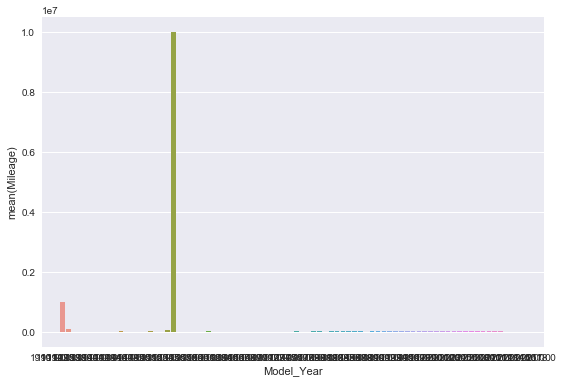

In [12]:
lessT = medianData[medianData['Mileage']<1000000000]
sns.barplot(x=lessT['Model_Year'], y=lessT['Mileage'], data=lessT)
sns.despine()
plt.tight_layout()

# lessT = data[data['Mileage']<100000] #взяли mile<100 000, чтобы можно было посмотреть, на большом масштабе не виждно
# sns.barplot(x=lessT['Model_Year'], y=lessT['Mileage'], data=lessT)
# sns.despine()
# plt.tight_layout()




## Condition

In [13]:
#===Condition
# Used = 1
# New = 0
data['Condition'] = data['Condition'].map({'Used': 1, 'New': 0})

## Buy_Now

In [14]:
#===Buy_Now
# True = 1
# False = 0
print(data['Buy_Now'].value_counts())
data['Buy_Now'] = data['Buy_Now'].map({True: 1.0, False: 0})



#Почему все нан

True     4025
False    3464
Name: Buy_Now, dtype: int64


In [83]:
data['Auction']

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18      False
19       True
20      False
21       True
22       True
23       True
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
7463    False
7464    False
7465    False
7466    False
7467    False
7468    False
7469    False
7470    False
7471    False
7472    False
7473    False
7474    False
7475    False
7476    False
7477    False
7478    False
7479    False
7480    False
7481    False
7482    False
7483    False
7484    False
7485    False
7486    False
7487    False
7488    False
7489    False
7490    False
7491    False
7492    False
Name: Auction, Length: 7489, dtype: bool

## Заполняем пустые строки нулями у некоторых столбцов


In [15]:
data['Condition_Desc'] = data['Condition_Desc'].fillna('no')
data['Location'] = data['Location'].fillna('no')
data['Warranty'] = data['Warranty'].fillna('no')
data['Sub_Model'] = data['Sub_Model'].fillna('no')
data['Type'] = data['Type'].fillna('no')
data['Watch_Count'] = data['Watch_Count'].fillna(0)


# Нижние категории были до этого удалены
data['Vehicle_Title'] = data['Vehicle_Title'].fillna('no')

data['Auction'] = data['Auction'].fillna(False)
data['Auction'] = data['Auction'].map({False: 0, True: 1})



# data['Feedback_Perc'] = data['Feedback_Perc'].fillna(0)
# data['Feedback_Perc'] = data['Feedback_Perc'].map(cleanSybols).astype(int)
# data['Feedback_Perc'] = data['Feedback_Perc'].map(cleanSybols).astype(int)



data['Bid_Count'] = data['Bid_Count'].fillna(0)



#вохможно стоить вместо no другие варианты. 

### Mileage

In [ ]:
#1. заполняем найденными медианами нули и минусы
# 2. Заполняем первые 50 лет максимумом из мединаы (999999)
# 3. Заполняем средним по столбцу 

In [16]:

# display(data.Mileage[data['Mileage']<=0].value_counts())

allMilesUnder = data.Mileage[data['Mileage']<=0]
# print(allMilesUnder)

# print(medianData[medianData.index == 39])

for mile in allMilesUnder.index:
    year = data.loc[mile,'Model_Year']
#     print("year - index: ", year, mile)
    medianMileageByYEAR = medianData.Mileage[medianData.Model_Year == year]
#     print(" medianMileageByYEAR: ", medianMileageByYEAR.values)
    data.loc[mile, 'Mileage'] = medianMileageByYEAR.values[0]
#     print(" ", data.loc[mile, 'Model_Year'])


##### Если медиаана и исходные данные пустые, подумать как можно заменить.

data.Mileage[data['Mileage']==-1]=0
data.Mileage[data['Mileage']>=100000]=100000
print(data.Mileage[data['Mileage']<0].value_counts())

Series([], Name: Mileage, dtype: int64)


/Users/Timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


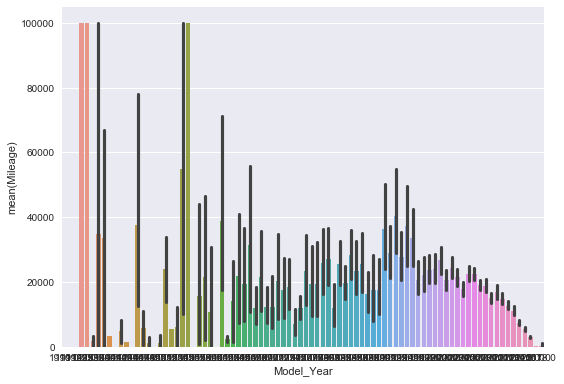

In [17]:
lessT = data[data['Mileage']<=1000000000]
sns.barplot(x=lessT['Model_Year'], y=lessT['Mileage'], data=lessT)
sns.despine()
plt.tight_layout()

# data.Mileage

In [18]:
print(data.Mileage[data['Mileage']<=0])
# print(data.Model_Year[data['Mileage'].index == 2829], medianData.Mileage[medianData['Model_Year']==1956.0] )

2829    0.0
3221    0.0
3319    0.0
3468    0.0
3564    0.0
3565    0.0
3616    0.0
3930    0.0
4769    0.0
4978    0.0
5228    0.0
5285    0.0
5608    0.0
5762    0.0
6066    0.0
6208    0.0
6327    0.0
6354    0.0
6997    0.0
7018    0.0
7073    0.0
7080    0.0
7140    0.0
7142    0.0
7158    0.0
7166    0.0
7167    0.0
7179    0.0
7193    0.0
7200    0.0
7261    0.0
7316    0.0
Name: Mileage, dtype: float64


In [17]:
allMilesUnder = data.Mileage[data['Mileage']<=1]

for mile in allMilesUnder.index:
    meanMile = data.Mileage.loc[mile-10:mile+10].mean()
    data.loc[mile, 'Mileage'] = meanMile
#     print(data.Mileage.loc[mile-10:mile+10])
#     print(mile, meanMile)


### Vehicle_Tile

In [18]:
print(data['Vehicle_Tile'].value_counts())
print(data.Vehicle_Tile[data['Vehicle_Tile'].isnull()].count())
data['Vehicle_Tile'] = data['Vehicle_Tile'].map({'Clear': 1, 'Salvage': 2, 'Rebuilt, Rebuildable &amp; Reconstructed':3, 'Flood, Water Damage':4})

print(data['Vehicle_Tile'].value_counts())

Clear                                       7159
Salvage                                      167
Rebuilt, Rebuildable &amp; Reconstructed     111
Flood, Water Damage                            2
Name: Vehicle_Tile, dtype: int64
0
1.0    7159
2.0     167
3.0     111
4.0       2
Name: Vehicle_Tile, dtype: int64


In [28]:


#Заполняем все nan
data['Vehicle_Tile'] = data['Vehicle_Tile'].fillna(0)
# data['Vehicle_Tile'] = data['Vehicle_Tile'].map({'no': 0})


In [22]:
print(data['Vehicle_Tile'].value_counts())
# print(data['Vehicle_Tile'])
print(data.Vehicle_Tile[data.Vehicle_Tile.isnull()])

1.0    7159
2.0     167
3.0     111
0.0      50
4.0       2
Name: Vehicle_Tile, dtype: int64
Series([], Name: Vehicle_Tile, dtype: float64)


### Seller status

In [19]:
#строки равные нулю заолняем медианой от ['Condition', 'Buy_Now']

# print(data.groupby(['Condition', 'Buy_Now'])['Seller_Status'].aggregate('median'))
medianConditionBuy = data.groupby(['Condition', 'Buy_Now'])['Seller_Status'].aggregate('median')
# print(medianConditionBuy)
medianCB=pd.DataFrame(medianConditionBuy)

medianCB  = medianCB.reset_index()
print(medianCB)
print(medianCB['Condition'])

   Condition  Buy_Now  Seller_Status
0          0      0.0              1
1          0      1.0              1
2          1      0.0              1
3          1      1.0              3
0    0
1    0
2    1
3    1
Name: Condition, dtype: int64


In [20]:
print(data.Seller_Status.value_counts())

allIndex = data.Seller_Status[data['Seller_Status']==0]

for mile in allIndex.index:
#     print(data.loc[mile, 'Seller_Status'])
    cond = data.loc[mile,'Condition']
    buy = data.loc[mile,'Buy_Now']
    
#     print(mile, cond, buy)
    ttt= medianCB.Condition[medianCB.Buy_Now == buy]
    ttt = pd.DataFrame(ttt)    
    tt = ttt[ttt.Condition == cond] 
    med = medianCB.Seller_Status[tt.index[0]]
#     print("\n", med)
    data.loc[mile, 'Seller_Status'] = med
#     print(data.loc[mile, 'Seller_Status'])


1    3766
3    2899
0     628
2     196
Name: Seller_Status, dtype: int64


### Model

In [21]:
# Посмотрим на зависимость модели от model_year
print(data.Model[data.Model.isnull()])
data.Model[data.Model.isnull()] = 'none'
medianMD = data.groupby(['Model'])['Model_Year'].aggregate('median')
medianMD = pd.DataFrame({'Model':medianMD.index, 'Model_Year':medianMD.values})
print(medianMD)


allMDs = data.Model[data.Model=='none']

for md in allMDs.index:
#     print("\n", data.loc[md,'Model'])
    mdy = data.loc[md,'Model_Year']
    medianMdy = medianMD.Model[medianMD.Model_Year == mdy]
    data.loc[md, 'Model'] = medianMdy.values[0]
#     print(data.loc[md,'Model'])





696     NaN
791     NaN
1448    NaN
1556    NaN
1845    NaN
1986    NaN
2050    NaN
2065    NaN
2131    NaN
2677    NaN
2739    NaN
2753    NaN
2829    NaN
2958    NaN
3221    NaN
3319    NaN
3919    NaN
3978    NaN
4327    NaN
4405    NaN
4430    NaN
4454    NaN
4481    NaN
4521    NaN
4619    NaN
4692    NaN
4747    NaN
4768    NaN
4783    NaN
4865    NaN
4951    NaN
4993    NaN
5003    NaN
5077    NaN
5193    NaN
5231    NaN
5238    NaN
5244    NaN
5882    NaN
5914    NaN
5951    NaN
5957    NaN
5977    NaN
6005    NaN
6054    NaN
6169    NaN
6178    NaN
6187    NaN
6418    NaN
6478    NaN
6525    NaN
6901    NaN
7320    NaN
7321    NaN
7322    NaN
Name: Model, dtype: object
                                            Model  Model_Year
0                  &#039;Retro&#039; Model &#039;      2007.0
1                                   007 dirt bike      2017.0
2                                        1100 EVO      2013.0
3                                      1100 Sport      1996.0
4  

/Users/Timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: index 0 is out of bounds for axis 0 with size 0

### Extrior_Color

In [22]:
data['Exterior_Color'].fillna('None',inplace=True)
data.Exterior_Color.isnull().count()

7489

### Watch_Count

In [23]:
def cleanSybols(x):
    print(x)
    x = str(x)
    return re.sub('[>,<]', '', x)

In [25]:
data['Watch_Count'] = data['Watch_Count'].map(cleanSybols).astype(int)

# data.Watch_Count.value_counts()
print(data['Watch_Count'])

0
17
0
0
13
0
0
0
16
0
0
0
0
0
0
0
0
0
8
23
0
0
0
0
15
0
25
22
0
31
1
0
12
8
0
0
0
0
0
0
5
2
14
0
4
9
0
4
8
7
16
4
9
18
0
24
5
7
5
0
4
4
0
5
14
5
0
9
2
2
6
2
2
0
3
0
6
2
0
6
0
0
3
3
5
0
5
0
0
9
7
2
10
0
0
1
16
0
0
17
6
2
18
0
14
0
1
0
5
5
8
1
1
0
41
4
0
0
0
0
0
4
11
8
11
4
3
47
9
21
2
0
6
0
0
0
15
0
8
4
31
8
0
19
0
6
0
0
34
0
0
0
31
0
3
8
0
19
10
8
0
2
0
0
7
0
0
1
0
0
4
0
0
9
0
0
3
0
0
0
13
24
0
0
0
27
14
7
12
11
26
11
17
18
0
0
0
3
42
7
0
0
5
42
0
7
0
0
3
16
0
0
9
7
0
13
10
0
0
0
9
4
18
0
11
0
8
26
14
19
0
22
0
0
0
5
0
9
7
15
10
18
8
0
12
12
0
17
12
0
10
0
4
0
2
5
8
11
0
0
0
17
0
7
14
7
17
5
9
22
0
7
4
19
71
7
15
6
41
15
0
18
4
4
0
15
5
0
31
98
6
0
0
1
7
10
8
11
0
0
0
24
29
0
6
27
11
0
7
0
7
5
8
12
0
16
14
11
19
3
6
0
0
6
11
0
0
26
10
1
0
10
0
11
10
3
0
31
11
0
6
0
0
0
3
9
12
10
0
6
31
11
0
6
0
0
24
0
0
3
9
12
0
0
2
11
43
0
6
0
3
2
17
0
0
12
7
0
0
4
0
3
7
0
0
2
1
7
0
5
0
10
0
5
0
21
27
4
0
6
2
33
0
5
21
1
7
13
6
4
7
0
20
12
6
0
49
3
0
6
0
5
0
7
0
13
0
19
1
89
9
0
3
5
10
5
13
53
0
10
2

0
0
14
0
0
0
8
0
0
0
0
0
17
0
0
18
0
0
2
8
2
0
0
22
0
3
0
0
0
3
3
9
0
19
3
3
15
0
2
2
7
1
6
41
8
0
0
0
0
14
11
3
12
7
0
2
0
12
3
8
0
13
18
1
6
6
2
0
0
2
8
5
0
5
0
0
0
3
2
28
0
0
19
3
2
1
3
6
0
1
0
0
0
1
4
0
1
0
13
10
0
2
0
0
3
6
2
2
0
2
0
11
0
1
0
9
5
3
0
0
0
16
3
3
21
5
0
0
0
3
2
11
1
3
10
0
0
0
4
0
4
4
0
0
1
2
0
3
0
0
2
2
0
0
0
2
1
3
9
0
0
1
6
0
6
0
5
0
10
6
0
1
0
0
0
10
4
1
0
0
10
0
4
0
0
0
15
0
0
4
0
0
0
11
1
1
1
5
3
2
7
2
0
0
9
21
0
7
0
11
5
0
0
0
8
0
10
3
5
2
4
1
9
7
0
2
0
0
0
0
3
0
0
0
4
3
3
1
3
3
1
0
0
0
1
12
2
4
8
5
2
3
9
8
0
0
0
7
1
2
1
0
11
1
5
1
9
8
11
5
13
4
5
0
0
1
3
6
1
0
0
3
0
0
0
2
0
6
0
0
4
2
0
8
0
42
6
7
0
0
11
0
0
1
1
0
0
1
1
0
0
0
0
16
8
0
15
2
3
5
0
0
5
0
0
0
6
0
0
31
0
0
0
0
0
5
29
0
1
0
1
0
0
1
0
5
0
0
0
0
0
8
0
0
0
0
0
0
19
0
0
0
3
3
0
7
0
2
2
0
0
0
0
1
0
4
7
0
0
17
0
4
0
0
8
1
5
0
1
0
0
5
1
0
0
0
0
11
0
0
0
0
0
3
8
0
19
0
0
0
0
0
0
3
15
6
1
39
1
0
0
6
0
2
0
1
0
1
0
5
4
0
0
0
8
1
5
3
5
0
1
0
19
0
6
1
15
1
39
0
8
5
5
2
1
7
1
0
0
2
0
1
2
0
11
30
8
15
2
0
3
0
0
0


In [26]:
data['OBO'] = data['OBO'].map({True: 1.0, False: 0})
data['OBO']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      1.0
19      0.0
20      1.0
21      0.0
22      0.0
23      0.0
24      1.0
25      0.0
26      0.0
27      1.0
28      0.0
29      1.0
       ... 
7463    1.0
7464    1.0
7465    1.0
7466    1.0
7467    1.0
7468    1.0
7469    0.0
7470    1.0
7471    1.0
7472    1.0
7473    1.0
7474    1.0
7475    1.0
7476    1.0
7477    1.0
7478    1.0
7479    1.0
7480    1.0
7481    1.0
7482    1.0
7483    1.0
7484    1.0
7485    1.0
7486    1.0
7487    1.0
7488    1.0
7489    1.0
7490    1.0
7491    1.0
7492    0.0
Name: OBO, Length: 7489, dtype: float64

In [ ]:
# data.drop(['Vehicle_Tile'], axis=1, inplace=True)
#Надо выяснить почему становвитс NAN

In [29]:

pd.isnull(data).sum() > 0

Condition         False
Condition_Desc    False
Location          False
Model_Year        False
Mileage           False
Exterior_Color    False
Make              False
Warranty          False
Model             False
Sub_Model         False
Type              False
Vehicle_Title     False
OBO               False
Watch_Count       False
N_Reviews         False
Seller_Status     False
Vehicle_Tile      False
Auction           False
Buy_Now           False
Bid_Count         False
dtype: bool

# Training

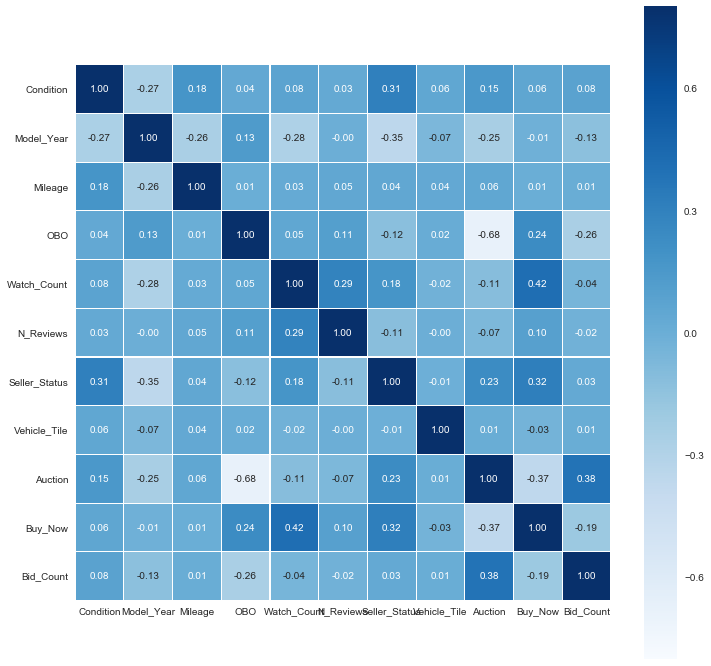

In [32]:
# 1. Корреляция 
colormap = 'Blues'
cor = data.corr()
# cor = cor.drop(['Id'],axis=1).drop(['Id'],axis=0)
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

# генерация признаков

Основные изменения в коде должны произойти в этом блоке.

**Краткое напоминание** :

0. Числовые признаки
    - для линейных моделей признаки стоит масштабировать
1. Категориальные признаки
    - для линейных моделей лучше сделать one-hot-encoding
    - для деревьев лучше сделать LabelEncoding
    - для категориальных признаков высокой размерности (>10) можно сделать кодирование средним значением таргета. Это облегчит работу и для деревьев, и для линейных моделей
2. Время и координаты
    - оба типа признаков обладают некоторым внутренним порядком (два момента времени можно сравнить, широту/долготу тоже)
    - оба типа признаков позволяют посчитать расстояния между объектами

In [30]:

# Spilt numeric and categorical features
cat_feats = data.select_dtypes(include=['object']).columns
num_feats = data.select_dtypes(include=['float64','int64', 'bool', 'int32']).columns
num_df = data[num_feats]
cat_df = data[cat_feats]
print('There are %d numeric features and %d categorical features\n' %(len(num_feats),len(cat_feats)))
print('Numeric features:\n',num_feats.values)
print('Categorical features:\n',cat_feats.values)

There are 11 numeric features and 9 categorical features

Numeric features:
 ['Condition' 'Model_Year' 'Mileage' 'OBO' 'Watch_Count' 'N_Reviews'
 'Seller_Status' 'Vehicle_Tile' 'Auction' 'Buy_Now' 'Bid_Count']
Categorical features:
 ['Condition_Desc' 'Location' 'Exterior_Color' 'Make' 'Warranty' 'Model'
 'Sub_Model' 'Type' 'Vehicle_Title']


In [31]:
# One hot encoding
one_hot_data = pd.get_dummies(cat_df)

#label encoding
label_encoder = LabelEncoder()
for column in cat_feats.values:
    print(column)
    data[column] = label_encoder.fit_transform(data[column])

# label_encode_data.value_counts().plot.barh()

# Merge all features
new_data_onehot = pd.concat([num_df,one_hot_data],axis=1)




Condition_Desc
Location
Exterior_Color
Make
Warranty
Model
Sub_Model
Type
Vehicle_Title


In [35]:
new_data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7489 entries, 0 to 7492
Columns: 7407 entries, Condition to Vehicle_Title_no
dtypes: float64(6), int64(5), uint8(7396)
memory usage: 53.8 MB


In [ ]:
xcols = [c for c in new_data if c != target]
print(xcols)

# валидация

In [32]:


X = data.select_dtypes(['int32', 'int64', 'float32', 'float64', 'bool'])


# X = new_data[xcols].select_dtypes(['int32', 'int64', 'float32', 'float64', 'bool'])
X = X.fillna(0)
X.info()

X_train = X.loc[itr]
X_test  = X.loc[ite]


##### for Linear Models from ONE HOt

X_onehot = new_data_onehot.select_dtypes(['int32', 'int64', 'float32', 'float64', 'uint8'])

# X = new_data[xcols].select_dtypes(['int32', 'int64', 'float32', 'float64', 'bool'])
X_onehot = X_onehot.fillna(0)

X_train_onehot = X_onehot.loc[itr]
X_test_onehot  = X_onehot.loc[ite]



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7489 entries, 0 to 7492
Data columns (total 20 columns):
Condition         7489 non-null int64
Condition_Desc    7489 non-null int64
Location          7489 non-null int64
Model_Year        7489 non-null float64
Mileage           7489 non-null float64
Exterior_Color    7489 non-null int64
Make              7489 non-null int64
Warranty          7489 non-null int64
Model             7489 non-null int64
Sub_Model         7489 non-null int64
Type              7489 non-null int64
Vehicle_Title     7489 non-null int64
OBO               7489 non-null float64
Watch_Count       7489 non-null int64
N_Reviews         7489 non-null int64
Seller_Status     7489 non-null int64
Vehicle_Tile      7489 non-null float64
Auction           7489 non-null int64
Buy_Now           7489 non-null float64
Bid_Count         7489 non-null float64
dtypes: float64(6), int64(14)
memory usage: 1.5 MB


In [191]:
# pd.isnull(X.loc[itr]).sum() > 0
# display(X.loc[itr].head(5))
# X.loc[ite].head(5)

# X_train.replace([np.inf, -np.inf], np.nan)
X_train[X_train.isnull()].count()
X_train

,Condition,Condition_Desc,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,Sub_Model,Type,Vehicle_Title,OBO,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,1.0,1131.0,1070.0,2013.0,16000.0,102.0,28.0,56.0,1387.0,1186.0,43.0,0.0,0.0,0.0,2427.0,3.0,1.0,1.0,0.0,28.0
2,1.0,1137.0,306.0,1970.0,25763.0,687.0,7.0,57.0,978.0,738.0,165.0,0.0,0.0,0.0,136.0,1.0,1.0,1.0,0.0,26.0
3,1.0,231.0,681.0,2009.0,33142.0,614.0,28.0,68.0,1387.0,1195.0,185.0,0.0,0.0,0.0,2920.0,1.0,1.0,1.0,0.0,11.0
5,1.0,517.0,1893.0,1972.0,8685.0,614.0,28.0,57.0,1234.0,1155.0,216.0,0.0,0.0,0.0,412.0,3.0,1.0,1.0,0.0,1.0
7,1.0,1137.0,1961.0,1975.0,17868.0,102.0,28.0,57.0,1234.0,1066.0,163.0,0.0,0.0,0.0,1159.0,3.0,1.0,1.0,0.0,6.0
10,1.0,1137.0,1961.0,1978.0,30.0,222.0,28.0,57.0,1387.0,639.0,43.0,0.0,0.0,0.0,1159.0,3.0,1.0,1.0,0.0,4.0
11,1.0,1137.0,1278.0,2011.0,5800.0,102.0,28.0,57.0,1387.0,901.0,185.0,0.0,0.0,0.0,83.0,3.0,1.0,1.0,0.0,21.0
13,1.0,686.0,1017.0,2000.0,57898.0,474.0,28.0,58.0,1387.0,1155.0,43.0,0.0,0.0,0.0,10701.0,1.0,1.0,1.0,0.0,2.0
16,1.0,1137.0,665.0,1973.0,9305.0,762.0,28.0,57.0,942.0,864.0,190.0,0.0,0.0,0.0,300.0,3.0,1.0,1.0,0.0,25.0
17,1.0,90.0,1410.0,2016.0,1125.0,180.0,28.0,59.0,1206.0,564.0,43.0,0.0,0.0,0.0,170.0,3.0,1.0,1.0,0.0,0.0


In [42]:
X_train = X_train.astype('float32')

X_train = X_train.fillna(0)
y_train = np.nan_to_num(y_train)

print(X_train)

      Condition  Condition_Desc  Location  Model_Year   Mileage  \
0           1.0          1131.0    1070.0      2013.0   16000.0   
2           1.0          1137.0     306.0      1970.0   25763.0   
3           1.0           231.0     681.0      2009.0   33142.0   
5           1.0           517.0    1893.0      1972.0    8685.0   
7           1.0          1137.0    1961.0      1975.0   17868.0   
10          1.0          1137.0    1961.0      1978.0      30.0   
11          1.0          1137.0    1278.0      2011.0    5800.0   
13          1.0           686.0    1017.0      2000.0   57898.0   
16          1.0          1137.0     665.0      1973.0    9305.0   
17          1.0            90.0    1410.0      2016.0    1125.0   
19          0.0          1137.0     444.0      2016.0     250.0   
21          1.0           480.0    1312.0      2005.0   25405.0   
22          1.0          1137.0     393.0      1982.0   28888.0   
23          1.0          1137.0    1893.0      2001.0   23658.

In [ ]:
print(len(itr), len(ite), len(X_train), len(y_train))
# print(pd.DataFrame(y_train).isnull().sum()>0)
# print(pd.isnull(y_train))
# print(X_train[X_train.isnull()].sum()>0)
# print(X_train)
X_train.replace((np.inf, -np.inf), 0)
np.nan_to_num(y_train)

# X_train[X_train.Buy_Now == -np.inf]

In [35]:
def rmse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) ** 0.5

## Random Forest

In [193]:

model = RandomForestRegressor()
# model = Ridge()

score_mse = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error')
score_rmse = score_mse ** 0.5
print(np.mean(score_rmse))

6903.92740233


In [194]:
model.fit(X_train, y_train)
X_test = X_test.fillna(0)

y_pred = model.predict(X_test)

rmse(y_test, y_pred)

5652.4427238116559

In [39]:
# Optimize

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

print("Best params: ", rf_random.best_params_)

y_pred = rf_random.best_params_.predict(X_test)

rmse(y_test, y_pred)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  12.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  12.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


## LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

X_train_onehot = X_train_onehot.fillna(0)
y_train = np.nan_to_num(y_train)

# np.sqrt(-cross_val_score(LogisticRegression(),X_train_onehot, y_train, cv=3, scoring='neg_mean_squared_error').mean())

/Users/Timur/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


7079.4289237126814

In [38]:
model_logistic = LogisticRegression()
# model = Ridge()

score_mse_logistic = -cross_val_score(model_logistic, X_train_onehot, y_train, scoring='neg_mean_squared_error')
score_rmse = score_mse_logistic ** 0.5
print(np.mean(score_rmse))


model_logistic.fit(X_train_onehot, y_train)
X_test_onehot = X_test_onehot.fillna(0)

y_pred = model_logistic.predict(X_test_onehot)

rmse(y_test, y_pred)

/Users/Timur/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


7039.80939038


7286.2461646129595

In [ ]:
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)

X_normalized_train = preprocessing.Normalizer().fit(X_train)
X_normalized_test = preprocessing.Normalizer().fit(X_test)

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.rmse)
print(rsearch.best_estimator_.alpha)

## XGBoost

In [36]:
import xgboost as xgb

np.sqrt(-cross_val_score(xgb.XGBRegressor(),X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean())

6450.9226401033366

In [42]:
print(X_train)
y_train

      Condition  Condition_Desc  Location  Model_Year   Mileage  \
0           1.0          1131.0    1070.0      2013.0   16000.0   
2           1.0          1137.0     306.0      1970.0   25763.0   
3           1.0           231.0     681.0      2009.0   33142.0   
5           1.0           517.0    1893.0      1972.0    8685.0   
7           1.0          1137.0    1961.0      1975.0   17868.0   
10          1.0          1137.0    1961.0      1978.0      30.0   
11          1.0          1137.0    1278.0      2011.0    5800.0   
13          1.0           686.0    1017.0      2000.0   57898.0   
16          1.0          1137.0     665.0      1973.0    9305.0   
17          1.0            90.0    1410.0      2016.0    1125.0   
19          0.0          1137.0     444.0      2016.0     250.0   
21          1.0           480.0    1312.0      2005.0   25405.0   
22          1.0          1137.0     393.0      1982.0   28888.0   
23          1.0          1137.0    1893.0      2001.0   23658.

array([11412,  3872,  6575, ...,  8900,  4900,  7800])

In [37]:
model = xgb.XGBRegressor()
# model = Ridge()

score_mse = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error')
score_rmse = score_mse ** 0.5
print(np.mean(score_rmse))


model.fit(X_train, y_train)
X_test = X_test.fillna(0)

y_pred = model.predict(X_test)


rmse(y_test, y_pred)

6449.86411335


5910.224801674698

# проверка на тестовых данных
rmse на тестовой выборке должно получиться меньше 5000

In [46]:

(data.columns)

Index(['Condition', 'Condition_Desc', 'Location', 'Model_Year', 'Mileage',
       'Exterior_Color', 'Make', 'Warranty', 'Model', 'Sub_Model', 'Type',
       'OBO', 'Watch_Count', 'N_Reviews', 'Seller_Status', 'Vehicle_Tile',
       'Buy_Now'],
      dtype='object')

In [47]:
## Using H2O lib
import h2o
from h2o.automl import H2OAutoML

In [48]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,12 hours 42 mins
H2O cluster version:,3.16.0.4
H2O cluster version age:,1 month and 23 days
H2O cluster name:,H2O_from_python_Timur_3eikds
H2O cluster total nodes:,1
H2O cluster free memory:,894 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [49]:
# print(y_train)

# print(pd.concat([X_train, pd.DataFrame(y_train)],axis=1))
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

h2o_train = pd.concat([X_train, pd.DataFrame(y_train)],axis=1)
h2o_train=h2o_train.rename(index=str, columns={0: "Price"})
# h2o_train['OBO'] = h2o_train['OBO'].map({True: 1.0, False: 0})

h2o_test = pd.concat([X_test, pd.DataFrame(y_test)],axis=1)
h2o_test=h2o_test.rename(index=str, columns={0: "Price"})
# h2o_test['OBO'] = h2o_test['OBO'].map({True: 1.0, False: 0})


In [50]:
h2o_tr_converted = h2o.H2OFrame(h2o_train, column_names = ['Condition', 'Condition_Desc', 'Location', 'Model_Year', 'Mileage',
       'Exterior_Color', 'Make', 'Warranty', 'Model', 'Sub_Model', 'Type',
       'OBO', 'Watch_Count', 'N_Reviews', 'Seller_Status', 'Vehicle_Tile',
       'Buy_Now', 'Price'])

h2o_te_converted = h2o.H2OFrame(h2o_test,column_names = ['Condition', 'Condition_Desc', 'Location', 'Model_Year', 'Mileage',
       'Exterior_Color', 'Make', 'Warranty', 'Model', 'Sub_Model', 'Type',
       'OBO', 'Watch_Count', 'N_Reviews', 'Seller_Status', 'Vehicle_Tile',
       'Buy_Now', 'Price'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [51]:
print(h2o_te_converted)

Condition,Condition_Desc,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,Sub_Model,Type,OBO,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Buy_Now,Price
1,698,584,2016,60,102,28,59,1387,901,159,0,17,657,3,1,1,17200
1,1137,1915,2012,17800,180,28,35,1387,833,185,0,13,271,2,1,1,10000
1,1137,1714,2010,5548,427,28,68,1387,497,185,0,0,6229,1,1,0,24900
1,1137,1337,2014,2800,291,28,57,1387,1155,185,0,16,3,3,1,1,5100
1,1137,306,2015,3000,102,28,59,1234,492,43,0,0,1,3,1,0,8000
1,1137,1383,2002,55000,609,28,57,942,671,185,0,0,128,3,1,0,1125
1,1137,412,2008,22102,545,28,57,1387,1155,185,0,0,244,3,1,0,5500
1,1137,1420,2010,7792,614,28,57,1387,422,185,0,0,299,3,1,0,9000
1,1137,137,2015,5500,614,28,59,1387,967,185,1,8,66,3,1,1,20000
0,1137,1320,2017,140,102,28,59,1387,1155,156,1,0,3172,3,1,1,10900


In [52]:

aml = H2OAutoML(max_runtime_secs = 3600)
aml.train(x = ['Condition', 'Model_Year', 'Mileage', 'OBO', 'Watch_Count', 'N_Reviews', 'Seller_Status', 'Vehicle_Tile', 'Buy_Now', 'Price'], y = target,
          training_frame = h2o_tr_converted,
          leaderboard_frame = h2o_te_converted)

# View the AutoML Leaderboard
lb = aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [53]:
lb

model_id,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_AllModels_0_AutoML_20180311_123219,4.43879e+07,6662.43,4291.07,0.992871
XRT_0_AutoML_20180311_123219,4.69116e+07,6849.2,4360.24,1.00511
GBM_grid_0_AutoML_20180311_123219_model_58,4.71773e+07,6868.57,4561.37,1.04583
GBM_grid_0_AutoML_20180311_123219_model_61,4.7191e+07,6869.57,4546.76,nan
GBM_grid_0_AutoML_20180311_123219_model_13,4.72171e+07,6871.47,4571.6,nan
GBM_grid_0_AutoML_20180311_123219_model_101,4.75009e+07,6892.09,4482.15,1.01109
GBM_grid_0_AutoML_20180311_123219_model_3,4.76267e+07,6901.21,4490.46,nan
GBM_grid_0_AutoML_20180311_123219_model_40,4.80757e+07,6933.67,4614.57,nan
GBM_grid_0_AutoML_20180311_123219_model_69,4.81509e+07,6939.09,4597.32,1.03561
GBM_grid_0_AutoML_20180311_123219_model_73,4.82464e+07,6945.97,4517.4,nan


In [63]:
# y_test

h2o_y_test = h2o.H2OFrame(y_test, column_names = ['Price'])
h2o_y_test


Price
17200
10000
24900
5100
8000
1125
5500
9000
20000
10900


In [60]:
preds = aml.leader.predict(h2o_y_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/Users/Timur/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset is missing column 'Condition': substituting in a column of NaN
  warnings.warn(w)
/Users/Timur/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset is missing column 'Model_Year': substituting in a column of NaN
  warnings.warn(w)
/Users/Timur/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset is missing column 'Mileage': substituting in a column of NaN
  warnings.warn(w)
/Users/Timur/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset is missing column 'OBO': substituting in a column of NaN
  warnings.warn(w)
/Users/Timur/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset is missing column 'Watch_Count': substituting in a column of NaN
  warnings.warn(w)
/Users/Timur/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: T

In [61]:
preds.head()


predict
8001.94
8001.94
8001.94
8001.94
8001.94
8001.94
8001.94
8001.94
8001.94
8001.94


In [62]:
perf = aml.leader.model_performance(h2o_te_converted)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 44387948.02748606
RMSE: 6662.428087978591
MAE: 4291.0668743373
RMSLE: 0.9928705949030111
R^2: 0.3900999505157813
Mean Residual Deviance: 44387948.02748606
Null degrees of freedom: 2497
Residual degrees of freedom: 2467
Null deviance: 181858658907.33963
Residual deviance: 110881094172.66019
AIC: 51138.99632912443


In [ ]:
# Save best model
model_path = h2o.save_model(model = aml.leader, path = "h2o_best", force=True)
print(model_path)

# load
# saved_model = h2o_load_model(model_path)